###**Name: Prashant Jain**

###**GRIP (Graduate Rotational Internship Program) - The Sparks Foundation : Task 3**


###**Exploratory Data Analysis - Retail**



**Problem Statement:**
Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’. As a business manager, try to find out the weak areas where you can work to make more profit.

###**Importing Essential Libraries**

In [ ]:
import pandas as pd   #data preprocessing
import numpy as np    #linear algbra
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns

###**Loading the Data**

In [ ]:
dataset=pd.read_csv('SampleSuperstore.csv')    #reading the dataset

In [ ]:
dataset.head()   #displaying top five rows in the dataset

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
dataset.shape   #size of the dataset

(9994, 13)

In [ ]:
dataset.columns  #columns for the dataset

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
# displaying null values and unique values in the dataset
temp=pd.DataFrame({'null_values': dataset.isnull().sum(),'number_of_unique values' : dataset.nunique()})

In [ ]:
temp

,null_values,number_of_unique values
Ship Mode,0,4
Segment,0,3
Country,0,1
City,0,531
State,0,49
Postal Code,0,631
Region,0,4
Category,0,3
Sub-Category,0,17
Sales,0,5825


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


**Describe Function is useful to get information about the categorical as well as the continous variable mainly about the continous variables.**

In [ ]:
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Checking For Duplicate data 

In [ ]:
dataset.duplicated().sum()

17

In [ ]:
#dropping the duplicates row
dataset.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


###**Exploratory Data Analysis**

In [ ]:
category_group = dataset.groupby(['Category','Sub-Category'])['Sales','Profit'].mean().reset_index()
category_group

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Category,Sub-Category,Sales,Profit
0,Furniture,Bookcases,503.859633,-15.230509
1,Furniture,Chairs,532.332420,43.095894
2,Furniture,Furnishings,95.825668,13.645918
3,Furniture,Tables,648.794771,-55.565771
4,Office Supplies,Appliances,230.755710,38.922758
5,Office Supplies,Art,34.068834,8.200737
6,Office Supplies,Binders,133.560560,19.843574
7,Office Supplies,Envelopes,64.867724,27.418019
8,Office Supplies,Fasteners,13.936774,4.375660
9,Office Supplies,Labels,34.303055,15.236962


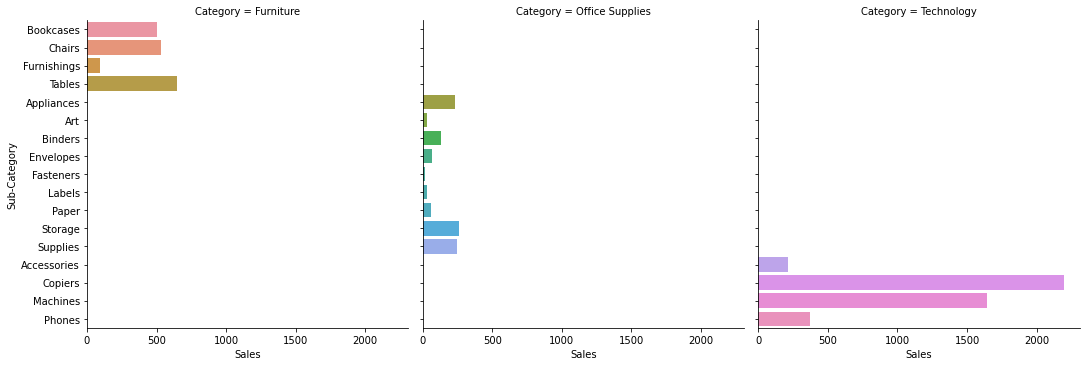

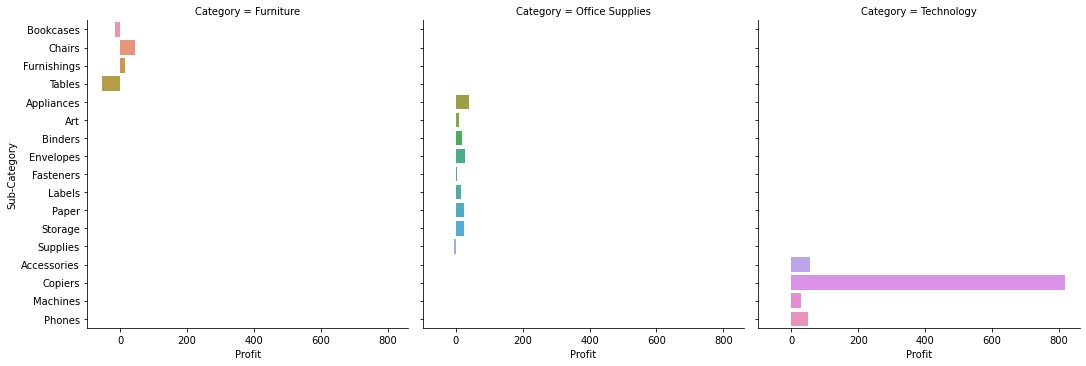

In [ ]:
# Plotting Catplot 
x = sns.catplot(x="Sales", 
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')

z = sns.catplot(x="Profit", 
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')

From these graphs, we can conclude that



*   In technology category, Sales are more than other two category.
*   In technology category, Copiers and Machines are sold the most.
*   In Furniture category, Bookcases and Tables are incurring a lose.
*   In Office Supplies category, there is a very minimal profit in all         sub-categories.
*   In technology category, Copiers provide the most profit among all others.



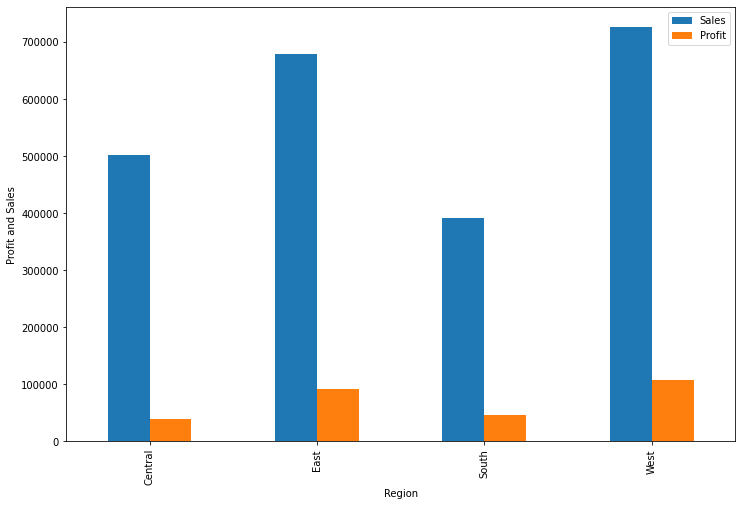

In [ ]:
# Barplot to check which region has least profit and least sales
dataset.groupby('Region')[['Sales','Profit']].agg('sum').plot(kind='bar',figsize=(12,8))
plt.ylabel('Profit and Sales')
plt.show()

In this graph we can see that Central and South region genrating less profit as compared to East and West region. Increase sales in Central and West region in order to generate more profit.

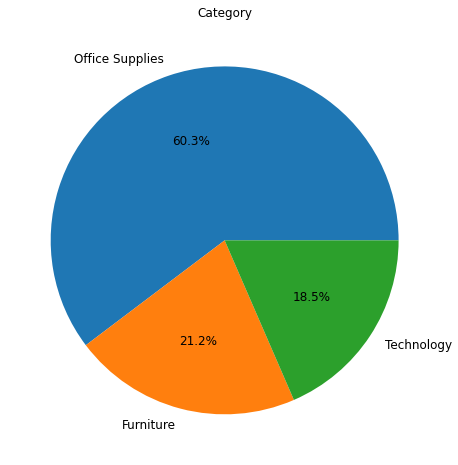

In [ ]:
#Pie chart for Category Column
plt.figure(figsize=(12,8))
textprops={'fontsize' : 12}
plt.title('Category')
plt.pie(x=dataset['Category'].value_counts(),labels=dataset['Category'].value_counts().index,autopct='%1.1f%%',textprops=textprops)
plt.show()

In this graph we can clearly see that the Office Supplies have higest demand

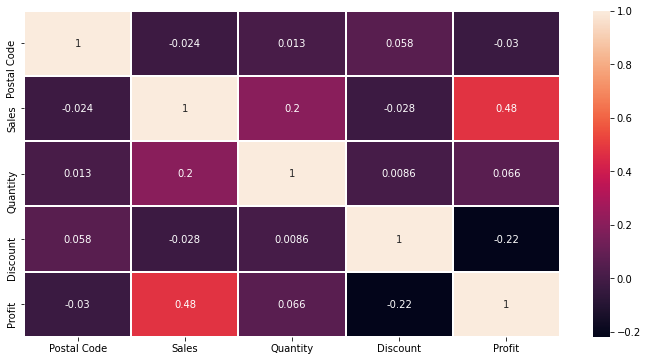

In [ ]:
# heatmap showing the correlation between the features
plt.figure(figsize=(12,6))
sns.heatmap(data=dataset.corr(),annot=True,linewidths=1, linecolor='white')

From this we can say that Profit and Sales has positive corrleation with each other i.e. if the Sales increase profit is also increase and vise versa

Text(0.5, 1.0, 'Count of Segment by Category and Segment')

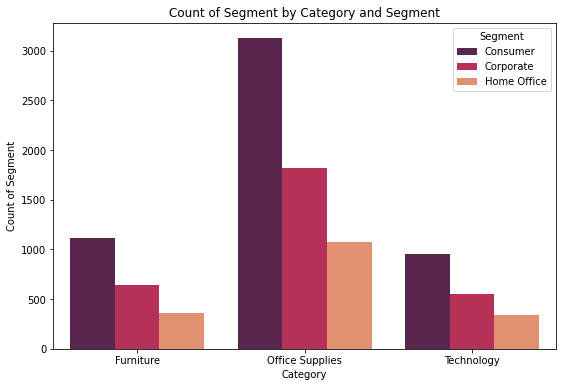

In [ ]:
#Countplot to check the purchases in each segment in each category
plt.figure(figsize=(9,6))
sns.countplot(x='Category',hue='Segment',data=dataset,palette='rocket')
plt.ylabel('Count of Segment')
plt.title('Count of Segment by Category and Segment')

The highest purchases are in consumer segment whereas home office segment has the least purchases in each category. We need to focus on the corporate and home office segment as well to increase our sales and profit.

In [ ]:
# Sub-Category wise Sales, Profit and Discount
df_sub_category = dataset.groupby(['Sub-Category'])[['Sales', 'Discount', 'Profit']].mean()
df_sub_category.head(10)


,Sales,Discount,Profit
Sub-Category,,,
Accessories,215.974604,0.078452,54.111788
Appliances,230.755710,0.166524,38.922758
Art,34.068834,0.074874,8.200737
Binders,133.560560,0.372292,19.843574
Bookcases,503.859633,0.211140,-15.230509
Chairs,532.332420,0.170178,43.095894
Copiers,2198.941618,0.161765,817.909190
Envelopes,64.867724,0.080315,27.418019
Fasteners,13.936774,0.082028,4.375660


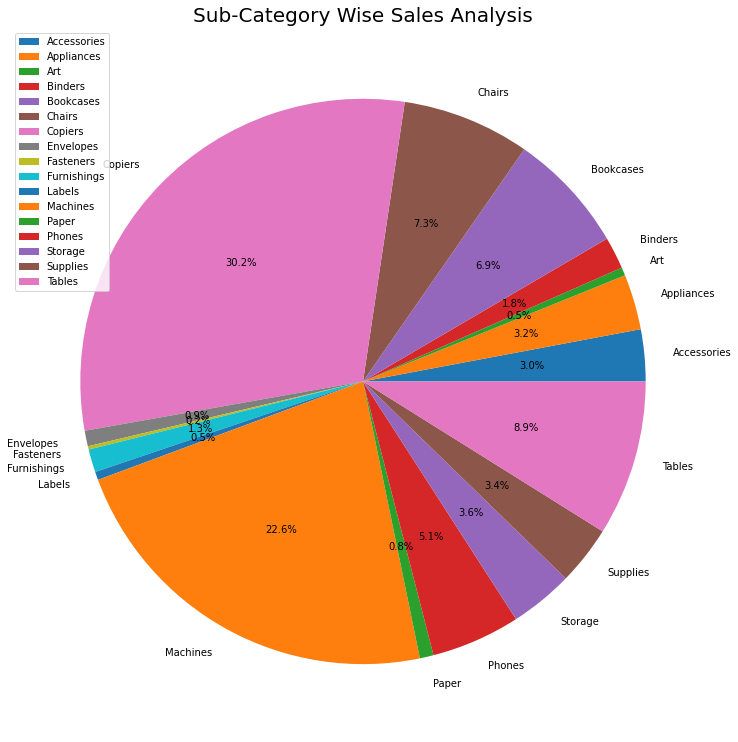

In [ ]:
#BASED ON THE SALES
plt.figure(figsize = (13,13))
plt.pie(df_sub_category['Sales'], labels = df_sub_category.index, autopct = '%1.1f%%')
plt.title('Sub-Category Wise Sales Analysis', fontsize = 20)
plt.legend()
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#Groupby sub_category with profit
total=dataset.groupby('State')['Sales'].mean().reset_index() 
total

,State,Sales
0,Alabama,319.846557
1,Arizona,157.508933
2,Arkansas,194.635500
3,California,228.729451
4,Colorado,176.418231
5,Connecticut,163.223866
6,Delaware,285.948635
7,District of Columbia,286.502000
8,Florida,233.612815
9,Georgia,266.825217


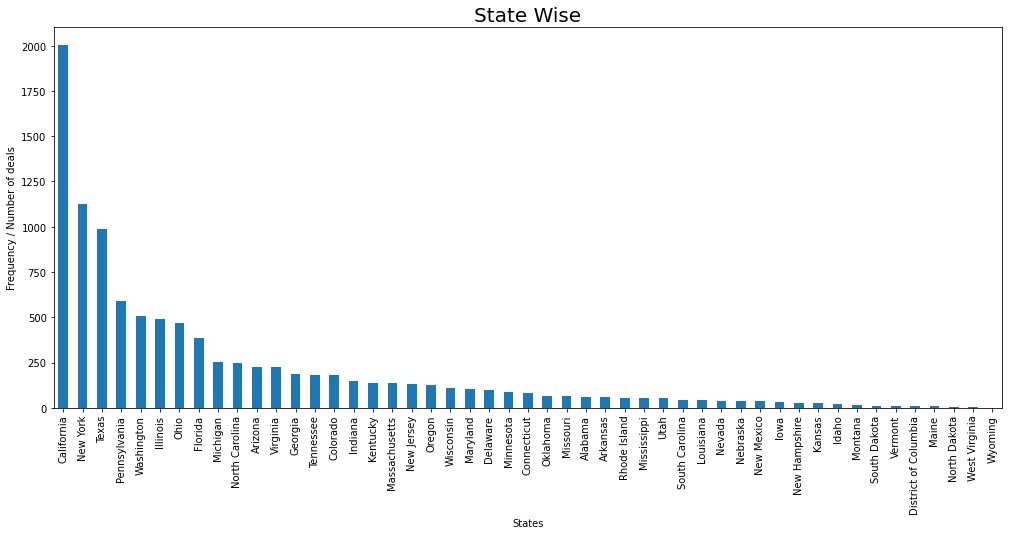

In [ ]:
#Bar plot for state
dataset["State"].value_counts().plot(kind='bar',figsize=(17,7))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('States')

plt.title('State Wise', fontsize = 20)
plt.show()

State wise California has highest sales. Few states like North Dakota, Wyoming and West Virginia have less or no sales at all. To generate more profit we have to increase our sales in Texas and New York where we have potential customers.

###**Thank You**